# 1 Business Understanding 
### 1.1 Business Overview
The telecommunications industry is one of the most competitive sectors worldwide, where customer retention plays a critical role in profitability and long-term sustainability. While acquiring new customers is costly, retaining existing ones is significantly more profitable (Propello, 2024).Globally, churn rates in telecom average around 31% annually, with mobile churn around 20%, highlighting the magnitude of the challenge.

Within Syria, the mobile telecom market is dominated by two key players: Syriatel and MTN-Syria. Syriatel, founded in 2000, currently holds about 71% of the market share and reported 20% revenue growth in 2019, equivalent to SYP 221bn (~US$242m) . Despite its dominance, Syriatel faces challenges from economic sanctions, instability, and increasing customer expectations for service quality, pricing, and personalization.(The Syria Report, 2020),For this reason, understanding what factors drive churn and how to reduce it is a key business priority.

Churn in this context refers to the proportion of customers who stop using Syriatel’s services, either by terminating contracts or switching to competitors. Understanding and reducing churn is crucial for Syriatel’s financial health and market leadership.


### 1.2 Problem Statement
Syriatel is experiencing customer churn that directly threatens its revenues and market position. While it has historically maintained a strong market share, rising competition, service quality issues, evolving customer demands, and broader political-economic instability increase the likelihood of customer attrition. Without effective churn prediction and retention strategies, Syriatel risks losing valuable customers, resulting in revenue loss, reduced market share, and diminished competitiveness.


### 1.3 Business Objective
#### 1.3.1 Main objective:
To develop a machine learning classifier that predicts whether a Syriatel customer is likely to churn, enabling data-driven strategies for proactive retention.
#### 1.3.2 Specific objectives:
1. To explore customer demographics and usage behaviour influencing churn.
2. To determine how charges influence customer churn
3. To develop and evaluate machine learning models that classify whether a customer is likely to churn.
4. optimize the models for best perfomance.
5. To provide actionable insights that support Syriatel in designing targeted retention campaigns (e.g., loyalty programs, personalized offers).
### 1.4 Research Questions
1. how does customer demographics and usage behaviour influence churn?
2. how charges influence customer churn?
3. what machine learning models best predict whether a customer is likely to churn.
4. Which optimization techniques and modeling approaches most effectively improve the predictive performance of machine learning model
5. How can predictive insights be applied to practical retention strategies to minimize churn?
### 1.5 Success Criteria
- Model Performance: Achieve at least 85% accuracy and a high AUC score (>0.85) in predicting churn.
- Business Impact: Provide insights that reduce churn rates by enabling proactive retention strategies, targeting high-risk customers before they leave.


## 2. Data Understanding
### 2.1 Data overview
The dataset is from kaggle with 3333 rows aand 21 columns

### Key Attributes
1. `state`: The state of the customer.
2. `account length`: The length of the account in days .
3. `area code`: The area code of the customer's phone number.
4. `phone number`: The phone number of the customer.
5. `international plan`: Whether the customer has an international plan or not.
6. `voice mail plan`: Whether the customer has a voicemail plan or not.
7. `number vmail messages`: The number of voicemail messages the customer has.
8. `total day minutes`: Total minutes of day calls.
9. `total day calls`: Total number of day calls.
10. `total day charge`: Total charge for the day calls.
11. `total eve minutes`: Total minutes of evening calls.
12. `total eve calls`: Total number of evening calls.
13. `total eve charge`: Total charge for the evening calls.
14. `total night minutes`: Total minutes of night calls.
15. `total night calls`: Total number of night calls.
16. `total night charge`: Total charge for the night calls.
17. `total intl minutes`: Total minutes of international calls.
18. `total intl calls`: Total number of international calls.
19. `total intl charge`: Total charge for the international calls.
20. `customer service calls`: Number of times the customer called customer service.
21. `churn`: Whether the customer churned or not (True/False).


## 3. Data Preparation
### 3.1. Data Cleaning

In [6]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Read the datset into pandas dataframe
df= pd.read_csv("Syria_tel.csv")
# Check the first 5 columns
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

As we can see from the above, This dataset does not contain any null values, and different columns are of different data types. We will need to check every unique values in the columns `international plan` and `voice mail plan`

In [10]:
# 
df['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
df['voice mail plan'].unique()

array(['yes', 'no'], dtype=object)

As for now, we can make the two columns to be of boolean datatype, yes representing True and no representing False

In [13]:
df['international plan'] = df['international plan'].map({'yes': True, 'no': False})
df['voice mail plan'] = df['voice mail plan'].map({'yes': True, 'no': False})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   bool   
 5   voice mail plan         3333 non-null   bool   
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

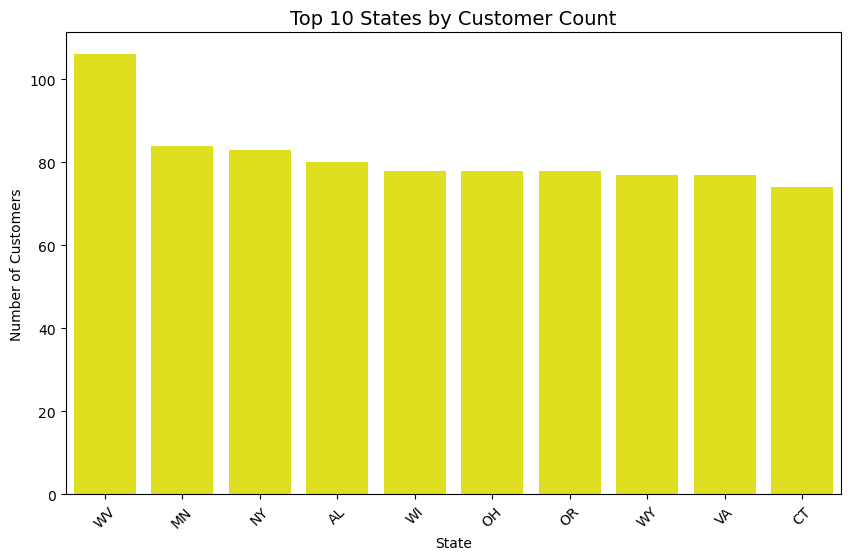

In [15]:
state_counts = df['state'].value_counts().head(10).reset_index()
state_counts.columns = ['state', 'count']

# Plot using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=state_counts, x='state', y='count', color= 'yellow')

plt.title("Top 10 States by Customer Count", fontsize=14)
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

In [16]:
state_counts = df['state'].value_counts().head(10)
state_counts


state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
Name: count, dtype: int64

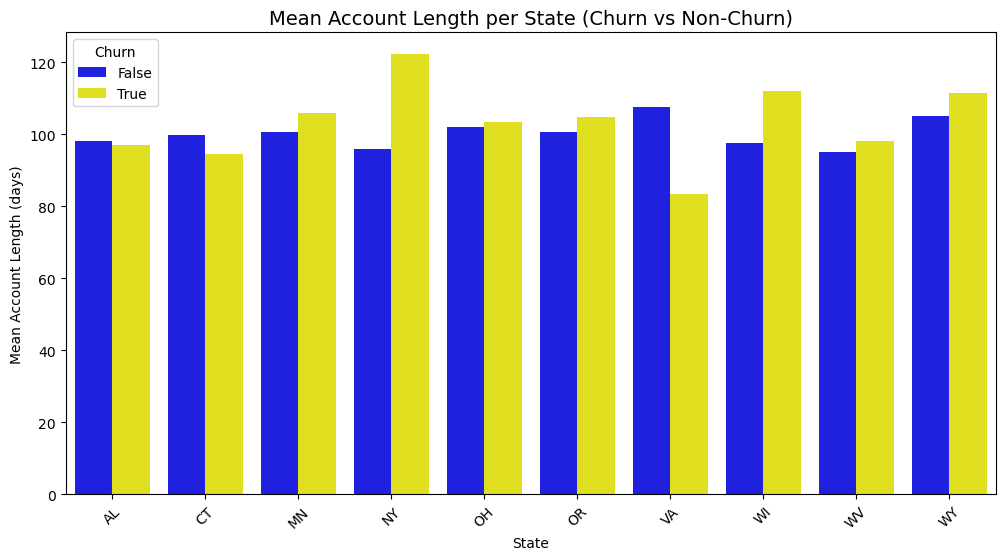

In [17]:
top_states = df['state'].value_counts().head(10).index

# Filter dataset for those states
df_top_states = df[df['state'].isin(top_states)]

# Group by state & churn, then compute mean account length
mean_acc_length = (
    df_top_states
    .groupby(['state', 'churn'])['account length']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=mean_acc_length, 
            x='state', y='account length', 
            hue='churn', palette=['blue','yellow'])

plt.title("Mean Account Length per State (Churn vs Non-Churn)", fontsize=14)
plt.xlabel("State")
plt.ylabel("Mean Account Length (days)")
plt.xticks(rotation=45)
plt.legend(title="Churn")
plt.show()

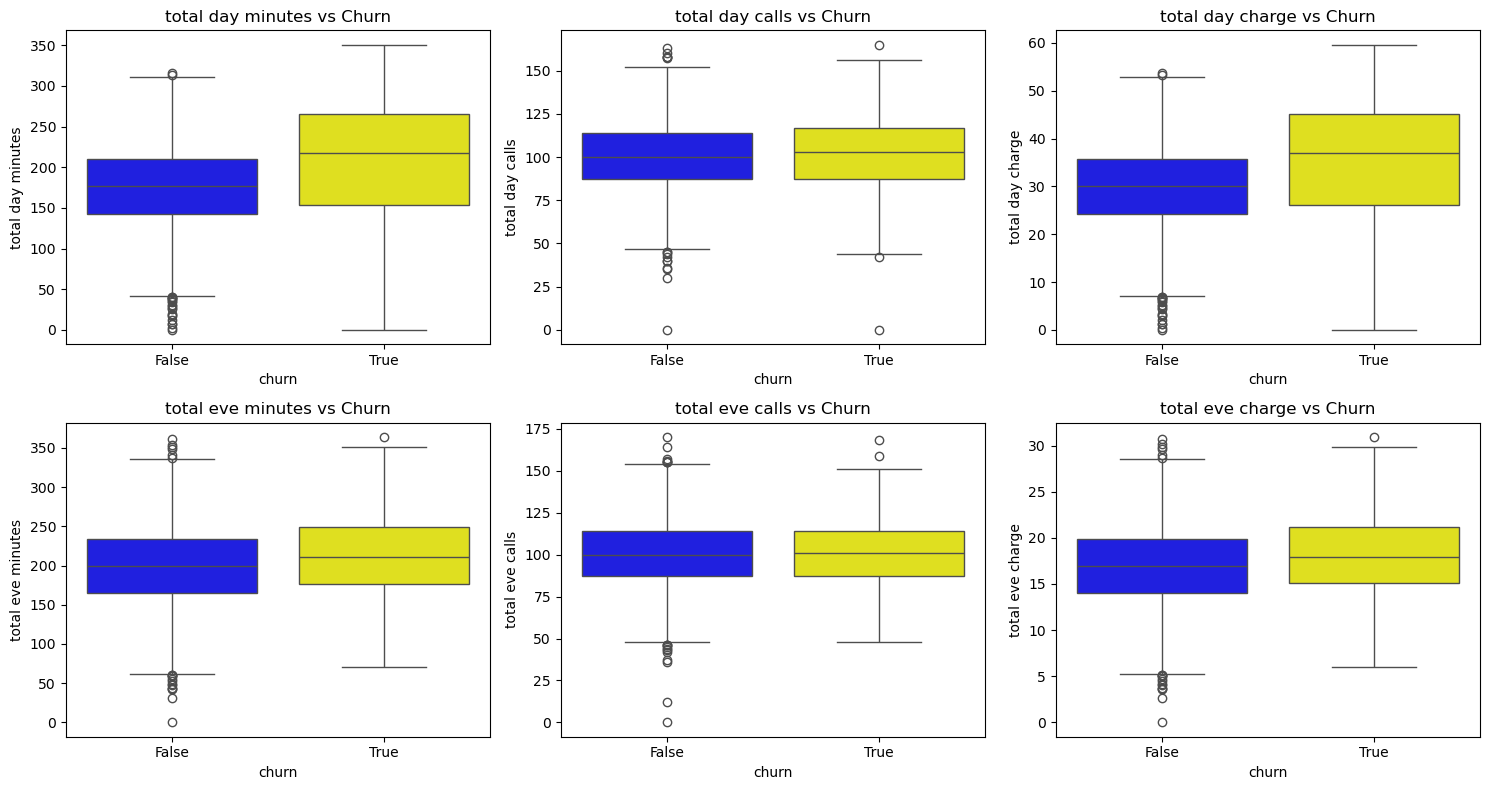

In [18]:
# First make a list of all the features in the dataset
features = [
    'total day minutes', 'total day calls', 'total day charge',
    'total eve minutes', 'total eve calls', 'total eve charge',
    'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge',
    'customer service calls'
]

# Visualize boxplots for each feature against churn
plt.figure(figsize=(15, 8))
for i, col in enumerate(features[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='churn', hue='churn', y=col, palette=["blue", "yellow"], legend= False)
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()